In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

import scipy.stats as stats

from evaluate_util import sds_file_handling

# check out https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html#matplotlib.axes.Axes.errorbar
# for plot of numerous experiments with same settings

exp_path = "experiments/" + "standard_/"

C:\Users\michi\Documents\Uni\_Master\_Thesis\project\venv\lib\site-packages\ignite\handlers\checkpoint.py:17: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


In [18]:
percentages, dice_dic = sds_file_handling(exp_path)
whole_performance = np.array([dice_dic[percentages[i]] for i in range(percentages.shape[0])]).squeeze()

C:\Users\michi\Documents\Uni\_Master\_Thesis\project\venv\lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

In [19]:
whole_performance.shape

(10, 2, 400)

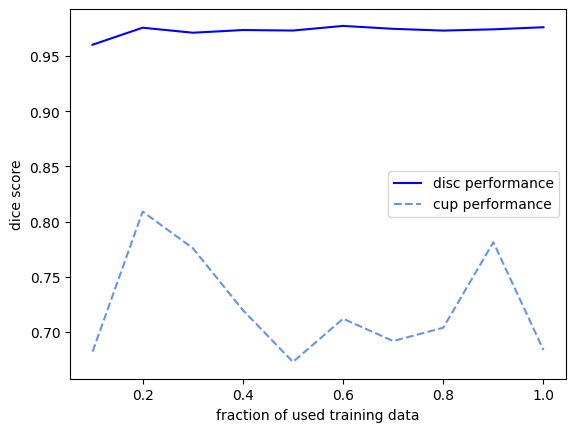

In [20]:
alpha = 0.05  # alpha level for confidence intervals

plt.errorbar(percentages,
             whole_performance.mean(axis=2)[:, 1],
             linestyle="-", color="b", label="disc performance")
plt.errorbar(percentages,
             whole_performance.mean(axis=2)[:, 0],
             linestyle="--", color="cornflowerblue", label="cup performance")
# plt.plot(percentages, disc_performance, linestyle="-", color="b", label="disc performance")
# plt.plot(percentages, cup_performance, linestyle="--", color="b", label="cup performance")
plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend()

C:\Users\michi\Documents\Uni\_Master\_Thesis\project\venv\lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

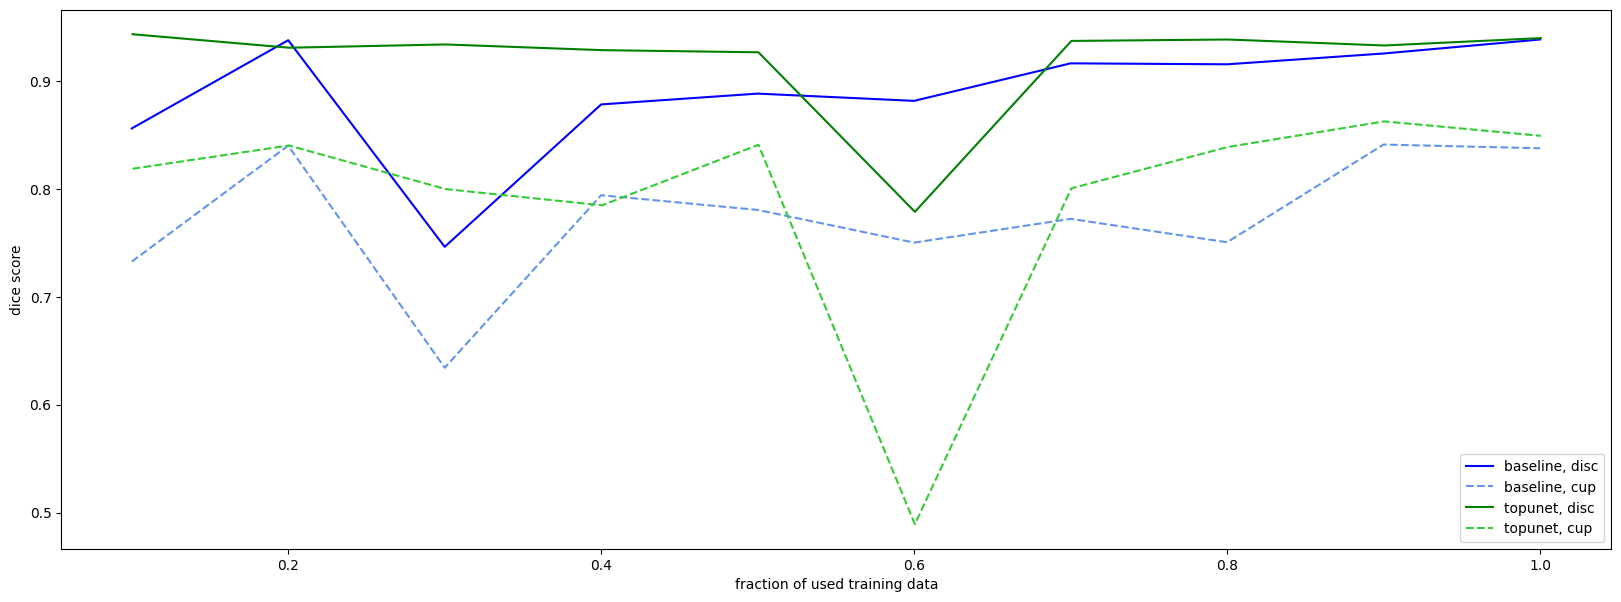

In [35]:
experiments_of_interest = ["topunet_sds_test_perc", "topunet"]
experiments_labels = ["baseline", "topunet", "topological loss, very narrow"]
# experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen")]
experiments_colors = [("b", "cornflowerblue"), ("green", "limegreen"), ("orangered", "coral")]
exp_paths = ["experiments/" + name + "/" for name in experiments_of_interest]

plt.rcParams["figure.figsize"] = (20,7)

for i in range(len(experiments_of_interest)):
    percentages, dice_dic = sds_file_handling(exp_paths[i])
    whole_performance = np.array([dice_dic[percentages[i]] for i in range(percentages.shape[0])]).squeeze()
    plt.errorbar(percentages+i/2000,
                 whole_performance.mean(axis=2)[:, 1],
                 linestyle="-", color=experiments_colors[i][0], label=experiments_labels[i] + ", disc")
    plt.errorbar(percentages+i/2000,
                 whole_performance.mean(axis=2)[:, 0],
                 linestyle="--", color=experiments_colors[i][1], label=experiments_labels[i] + ", cup")

plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend(loc=4) # loc 4 ... lower right
plt.show()

C:\Users\michi\Documents\Uni\_Master\_Thesis\project\venv\lib\site-packages\torch\storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

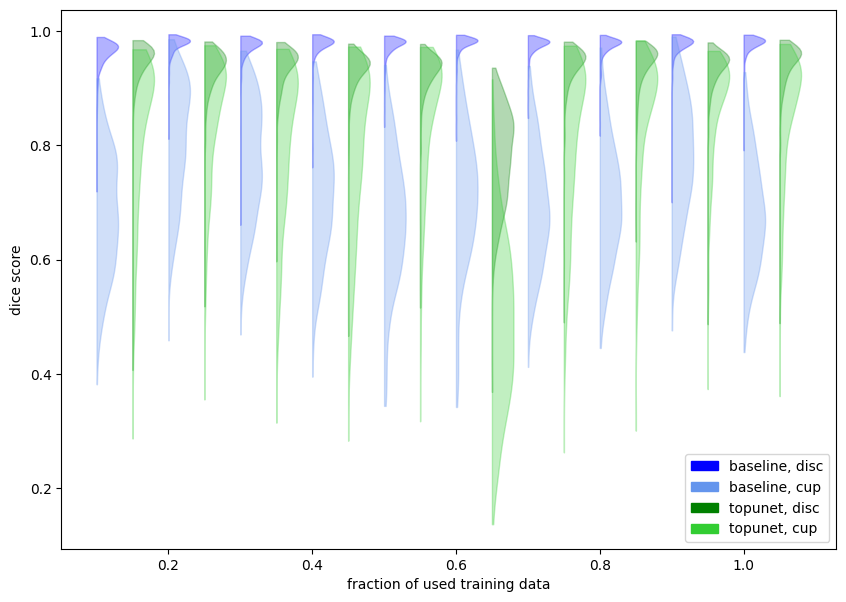

In [34]:
patches = []
labels = []
plt.rcParams["figure.figsize"] = (10,7)
width = 0.06 # widths depends on the percentage area we look at
shift_factor = 20

for i in range(len(experiments_of_interest)):
    percentages, dice_dic = sds_file_handling(exp_paths[i])
    whole_performance = np.array([dice_dic[percentages[i]] for i in range(percentages.shape[0])]).squeeze()
    violin = plt.violinplot(whole_performance[:, 1].T,
                            positions = [p + i/shift_factor for p in percentages],
                            widths=width,
                            showmeans=False,
                            showextrema=False,
                            side="high") 
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][0])
        pc.set_edgecolor(experiments_colors[i][0])
    # for partname in ('cbars','cmins','cmaxes'):
    #     vp = violin[partname]
    #     vp.set_edgecolor(experiments_colors[i][0])
    patches.append(mpatches.Patch(color=experiments_colors[i][0]))
    labels.append(experiments_labels[i] + ", disc")
    
    violin = plt.violinplot(whole_performance[:, 0].T,
                            positions = [p + i/shift_factor for p in percentages],
                            widths=width,
                            showmeans=False,
                            showextrema=False,
                            side="high") 
    for pc in violin['bodies']:
        pc.set_facecolor(experiments_colors[i][1])
        pc.set_edgecolor(experiments_colors[i][1])
    # for partname in ('cbars','cmins','cmaxes'):
    #     vp = violin[partname]
    #     vp.set_edgecolor(experiments_colors[i][1])
    patches.append(mpatches.Patch(color=experiments_colors[i][1]))
    labels.append(experiments_labels[i] + ", cup")


plt.xlabel("fraction of used training data")
plt.ylabel("dice score")
plt.legend(patches, labels, loc=4) # loc 4 ... lower right
plt.savefig("comparison.png")
plt.show()